<a href="https://colab.research.google.com/github/Luciesprogram/Deep-Learning/blob/main/Training_deep_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Glort Initilization*
1. Activation Functions:- tanh,sigmoid,softmax   variance:- 1/fan(avg)
2. By default keras use Glorot intilization

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf

dense = tf.keras.layers.Dense(50,activation="relu",kernel_initializer="he_normal") # Changing the kernel initilizer from glorot to he_normal intilizer

Using he_initializer with uniform distribution

In [ ]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2,mode="fan_avg",distribution="uniform")

he_dense = tf.keras.layers.Dense(50,activation="sigmoid",kernel_initializer=he_avg_init)

### **Activation Function**

### **ReLU**

1. ReLu follow from the problem of dying relu, during training some neurons die and stop outputing anything other than zero.
2. Some times half of the neurons die due to high learning rate.
3. A neuron dies when its weights
get tweaked in such a way that the input of the ReLU function (i.e., th
weighted sum of the neuron’s inputs plus its bias term) is negative for a l
instances in the train ng s
4. And gradient descent does not affect it anymore because the gradient of
the ReLU function is zero when its input is negativ

** To overcome this problem LeakyReLu**eet.

### **LeakyReLu**

LeakyReLU (z) = max(αz,z) :- The hyperparameter α defines how much the function
“leaks”: it is the slope of the function for z < 0. Having a slope for z < 0
ensures that leaky ReLUs never die;

In [ ]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)
lrdense = tf.keras.layers.Dense(50,activation=leaky_relu,kernel_initializer="he_normal")
# we prefer we can use leakyReLU as seprate layer also

/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
'''
model.keras.models.Sequential([
    [....] #more layers
    tf.keras.layers.Dense(50,kernel_intializer="he_normal"),
    tf.keras.layers.LeakyReLU(alpha=0.2),
     [..] #more layers
])
'''

'\nmodel.keras.models.Sequential([\n    [....] #more layers\n    tf.keras.layers.Dense(50,kernel_intializer="he_normal"),\n    tf.keras.layers.LeakyReLU(alpha=0.2),\n     [..] #more layers\n])\n'

New activation functions came ELU and SELU

ELU(exponential linear unit):- ELU α ( z ) = α ( exp ( z ) - 1 ) if z < 0 z if z ≥ 0
1. It does not look like ReLU
2. It reduces the training time and removes the problem of vanishing gradients.
3. It takes on negative values when z < 0, which allows the unit to have an
average output closer to
4. Implementation (activation='elu')

SELU(Scaled linear unit)
1. If we have stack of hidden layers using activation as SELU then the network will be self normalized0

## **Batch Normalizartion**

1. using HE initialization with ReLU reduces the danger of vanishing/exploding gradients.
2. Techinique to add operation in a model
3. This operation simply zero center and normalizes each input.
4. In many cases BN(Batch Normalization) is use as a first layer instead of Standard Scaler or nomalization layer.
5. BN layer is use before and after of each hidden layer.
6. In order to zero-center or normalize the input the algorithm needs to estimate the input mean ans standard deviation.
7. BN acts like a regulaizer reducing the need of other regularization techniques.
8. NN takes the runtime penalty and make slower predictions.
9. Possible to fuse BN layer and pass runtime penalty, done by updating previous layer weights and baiases so that directly prooduces outputs.
10. Each BN layer adds four parameters per input: γ, β, μ, and σ
11. The last two parameters, μ and σ, are the moving averages; they are not
affected by backpropagation, so Keras calls them “non-trainable”

Implementing Batch Normalization with Keras

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10,activation="softmax")

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [ ]:
[(var.name, var.trainable) for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

1. To add BN layers before and after of each layers we must remove activation fuction from it and add them as a seprate layer after it.
2. we have one offset in this we can remove bias term from previous layer using use_bias = False.
3. Lastly drop the first BN layer to avoid sandwitch the hidden layer.

In [ ]:
# Demonstaration for that.

model = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=[28, 28]),
tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Activation("relu"),
tf.keras.layers.Dense(10, activation="softmax")
])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 267,810 (1.02 MB)

 Trainable params: 267,010 (1.02 MB)

 Non-trainable params: 800 (3.12 KB)

## **Gradient Clipping**
Another techinique to mitiagate the exploding gradient problem. Cliping the gradient during backpropagation so that they never exceed some threshold.
Technique used in RNN but in batch normalization it is tricky.

In [ ]:
# setting clipvalue and clipnorm when creating an optimizer.
# all Tf.keras.optimizer accept clipvalue and clipnorm
optimizer = tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer)
# clips the every component value between -1.0 to 1.0

In [ ]:
optimizer = tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer)

In [ ]:
# Threshold is a hyperparameter
# clipnorm hold the whole gradient vector so that cliping does not change the direction.


## **Resuing Pretrained layers**

Reusing pretrained models for similar type of task. Generally using pretrained layer except the top and last onces. This technique is called trasfer learning.
Input and output layer can vary with task. try frezzing the first layer(to make weights non trainable so that gradients won't modify. And try unfrezzing and checking accuracy for that.

### **Transfer Learning**

Let's split the fashion MNIST training set in two:


*   X_train_A: all images of all items except for T-shirts/tops and pullovers (classes 0 and 2).
*   X_train_B: a much smaller training set of just the first 200 images of T-shirts/tops and pullovers.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (trousers, dresses, coats, sandals, shirts, sneakers, bags, and ankle boots) are somewhat similar to classes in set B (T-shirts/tops and pullovers). However, since we are using Dense layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the chapter 14).

In [2]:
# extra code – split Fashion MNIST into tasks A and B, then train and save
#              model A to "my_model_A".
import numpy as np
import pandas as pd
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X, y):
    y_for_B = (y == pos_class_id) | (y == neg_class_id)
    y_A = y[~y_for_B]
    y_B = (y[y_for_B] == pos_class_id).astype(np.float32)
    old_class_ids = list(set(range(10)) - set([neg_class_id, pos_class_id]))
    for old_class_id, new_class_id in zip(old_class_ids, range(8)):
        y_A[y_A == old_class_id] = new_class_id  # reorder class ids for A
    return ((X[~y_for_B], y_A), (X[y_for_B], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)

model_A = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(8, activation="softmax")
])

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                      validation_data=(X_valid_A, y_valid_A))
model_A.save("my_model_A.keras")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2597 - loss: 37.5248 - val_accuracy: 0.4024 - val_loss: 1.6245
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4298 - loss: 1.4919 - val_accuracy: 0.4487 - val_loss: 1.4446
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4617 - loss: 1.3849 - val_accuracy: 0.5505 - val_loss: 1.2486
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5601 - loss: 1.1652 - val_accuracy: 0.5736 - val_loss: 1.1219
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5722 - loss: 1.0836 - val_accuracy: 0.5856 - val_loss: 1.0613
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5798 - loss: 1.0311 - val_accuracy: 0.5906 - val_loss: 1.0260
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5836 - loss: 0.9924 - val_accuracy: 0.5919 - val_loss: 0.9959
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5875 - loss: 0.9599

In [ ]:
# extra code – train and evaluate model B, without reusing model A

tf.random.set_seed(42)
model_B = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_B.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["accuracy"])
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))
model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5937 - loss: 524.6942 - val_accuracy: 0.4847 - val_loss: 352.3432
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5059 - loss: 677.9169 - val_accuracy: 0.6627 - val_loss: 0.9274
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6617 - loss: 0.6727 - val_accuracy: 0.6528 - val_loss: 0.9468
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7603 - loss: 0.5272 - val_accuracy: 0.6558 - val_loss: 2.9434
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5863 - loss: 2.1063 - val_accuracy: 0.6716 - val_loss: 0.8625
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7253 - loss: 0.5610 - val_accuracy: 0.7151 - val_loss: 0.7849
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7534 - loss: 0.4461 - val_accuracy: 0.6983 - val_loss: 0.7677
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7578 - loss: 0.4044 - val_accuracy: 0.7072 - val_loss: 0

[0.4974493384361267, 0.890500009059906]

Model B reaches 91.39% accuracy on the test set. Now let's try reusing the pretrained model A.

In [ ]:
model_A = tf.keras.models.load_model("my_model_A.keras")
model_B_on_A = tf.keras.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
# when we train model_B_on_A it also affect model A. If we want avoid it need to clone model_A before reuse its layers.

model_A_clone = tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights()) # clone model only clone the architecture not weights coping weights using set_weights()

In [ ]:
# new output layer was intialized randomaly it will make large errors(during first few epochs).
# we frezze it for first few eopchs.

for layers in model_B_on_A.layers[:-1]:
  layers.trainable = False

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

# we must compile the model after frezze or unfrezze layers

In [ ]:
# Now we can train model for few epochs

history = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,validation_data=(X_valid_B,y_valid_B))

for layers in model_B_on_A .layers[:-1]:
  layers.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model_B_on_A.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16,validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.3342 - loss: 5.3555 - val_accuracy: 0.2918 - val_loss: 1.8792
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3758 - loss: 1.7788 - val_accuracy: 0.5054 - val_loss: 1.2010
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5659 - loss: 1.1406 - val_accuracy: 0.5658 - val_loss: 0.9171
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6503 - loss: 0.8864 - val_accuracy: 0.6133 - val_loss: 0.7463
Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8262 - loss: 0.5250 - val_accuracy: 0.8437 - val_loss: 0.3605
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8751 - loss: 0.2802 - val_accuracy: 0.8793 - val_loss: 0.2937
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9404 - loss: 0.1771 - val_accuracy: 0.8882 - val_loss: 0.2715
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9490 - loss: 0.1579 - val_accuracy: 0.8961 - val_loss: 0.2594
Epoc

In [ ]:
model_B_on_A.evaluate(X_test_B,y_test_B)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9113 - loss: 0.2390


[0.24323907494544983, 0.9125000238418579]

error is increased by 31% using transfer learning.
we need to use different approch and frezze and unfrezze by different method.
Transfer learning does'nt work well with small networks, as it learn small patterns and dense learn specific patterns.

In [ ]:
1 - (100 - 91.39) / (100 - 87.5)

0.31120000000000003

# **Fast Optimizer**
In this different types of optimizers are discussed because gradient optimizer is very slow in compare with these one.

In [9]:
# extra code – a little function to test an optimizer on Fashion MNIST

def build_model(seed=42):
    tf.random.set_seed(seed)
    return tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal"),
        tf.keras.layers.Dense(10, activation="softmax")
    ])

def build_and_train_model(optimizer):
    model = build_model()
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model.fit(X_train, y_train, epochs=10,
                     validation_data=(X_valid, y_valid))

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
history = build_and_train_model(optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4147 - loss: 10.6327 - val_accuracy: 0.4684 - val_loss: 1.2825
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5066 - loss: 1.2152 - val_accuracy: 0.6002 - val_loss: 0.9285
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6370 - loss: 0.8883 - val_accuracy: 0.6892 - val_loss: 0.8201
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6899 - loss: 0.7608 - val_accuracy: 0.7042 - val_loss: 0.7475
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7079 - loss: 0.7075 - val_accuracy: 0.7326 - val_loss: 0.7244
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7158 - loss: 0.6842 - val_accuracy: 0.7276 - val_loss: 0.6755
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7259 - loss: 0.6546 - val_accuracy: 0.7334 - val_loss: 0.6755
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7319 - loss: 0.6377 -

## **Momentum**

In [42]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9)

In [43]:
history_momentum = build_and_train_model(optimizer)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0993 - loss: 20687.4355 - val_accuracy: 0.1030 - val_loss: 2.3037
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0982 - loss: 2.3032 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0971 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0983 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0981 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0978 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0978 - loss: 2.3027 - val_

## **Nesterov Accelerated Gradient**


*   It is faster than normal momentum.
*   It measures the gradient of the cost function not at the
local position θ but slightly ahead in the direction of the momentum, at θ +βm


In [ ]:
NAG_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True)

In [ ]:
history_NAG = build_and_train_model(NAG_optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0973 - loss: 1162074.7500 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0977 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0976 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0976 - loss: 

## **AdaGrad**


*   It is not recommended for deep learning but we cann use it in simple task like linear regression.
*   It is faster then NAG.
*   It find the direction of optimum faster and move in that direction.
*   List item





In [ ]:
ada_optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
ada_history = build_and_train_model(ada_optimizer)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6258 - loss: 11.1912 - val_accuracy: 0.7238 - val_loss: 3.9476
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7376 - loss: 3.5989 - val_accuracy: 0.7360 - val_loss: 3.2320
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7545 - loss: 2.9172 - val_accuracy: 0.7444 - val_loss: 2.8876
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7631 - loss: 2.5632 - val_accuracy: 0.7544 - val_loss: 2.6546
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7702 - loss: 2.3287 - val_accuracy: 0.7560 - val_loss: 2.5009
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7764 - loss: 2.1546 - val_accuracy: 0.7592 - val_loss: 2.3635
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7813 - loss: 2.0156 - val_accuracy: 0.7646 - val_loss: 2.2558
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7845 - loss: 1.9028

## **RMSProp**

In [ ]:
rmsp_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9)
rmsp_history = build_and_train_model(rmsp_optimizer)

Epoch 1/10


## **Adam**

Adam, which stands for adaptive moment estimation, combines the ideas
of momentum optimization and RMSProp: just like momentum optimization,
it keeps track of an exponentially decaying average of past gradients; and just
like RMSProp, it keeps track of an exponentially decaying average of past
squared gradients

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1 = 0.9,beta_2=0.999)
adam_history = build_and_train_model(adam_optimizer)

## **AdaMax**

In [39]:
adamax_optimizer = tf.keras.optimizers.Adamax(learning_rate=0.01,beta_1=0.9,beta_2=0.999)
adamax_history = build_and_train_model(adamax_optimizer)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6437 - loss: 25.2132 - val_accuracy: 0.6940 - val_loss: 1.0263
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7083 - loss: 0.9015 - val_accuracy: 0.7288 - val_loss: 0.9201
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7320 - loss: 0.7882 - val_accuracy: 0.7916 - val_loss: 0.6019
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7941 - loss: 0.6004 - val_accuracy: 0.8056 - val_loss: 0.5549
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8167 - loss: 0.5342 - val_accuracy: 0.8020 - val_loss: 0.5617
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8272 - loss: 0.5039 - val_accuracy: 0.8238 - val_loss: 0.5051
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8363 - loss: 0.4808 - val_accuracy: 0.8300 - val_loss: 0.5323
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8395 - loss: 0.4744 - val_ac

In [46]:
nadam_optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
nadam_history = build_and_train_model(nadam_optimizer)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6773 - loss: 9.3037 - val_accuracy: 0.7652 - val_loss: 0.9746
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7827 - loss: 0.7528 - val_accuracy: 0.8102 - val_loss: 0.6125
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8047 - loss: 0.5970 - val_accuracy: 0.8110 - val_loss: 0.5889
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8218 - loss: 0.5258 - val_accuracy: 0.8134 - val_loss: 0.5840
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8323 - loss: 0.4901 - val_accuracy: 0.8288 - val_loss: 0.4691
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8393 - loss: 0.4586 - val_accuracy: 0.8190 - val_loss: 0.5610
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8493 - loss: 0.4305 - val_accuracy: 0.8328 - val_loss: 0.4890
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8575 - loss: 0.3994 - val_accur

## **AdamW**
AdamW is a variant of Adam that integrates a regularization technique called  weight decay. Weight decay reduces the size of the model’s weights at
each training iteration by multiplying them by a decay factor such as 0.99.

In [41]:
adamw_optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
adamw_history = build_and_train_model(adamw_optimizer)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6643 - loss: 9.0274 - val_accuracy: 0.7458 - val_loss: 0.8335
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7692 - loss: 0.7805 - val_accuracy: 0.7806 - val_loss: 0.6370
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7939 - loss: 0.6151 - val_accuracy: 0.7736 - val_loss: 0.6905
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8117 - loss: 0.5558 - val_accuracy: 0.8132 - val_loss: 0.5658
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8249 - loss: 0.4989 - val_accuracy: 0.8234 - val_loss: 0.4869
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8431 - loss: 0.4438 - val_accuracy: 0.8200 - val_loss: 0.4691
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8477 - loss: 0.4281 - val_accuracy: 0.8212 - val_loss: 0.4940
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8535 - loss: 0.4102 - val_a

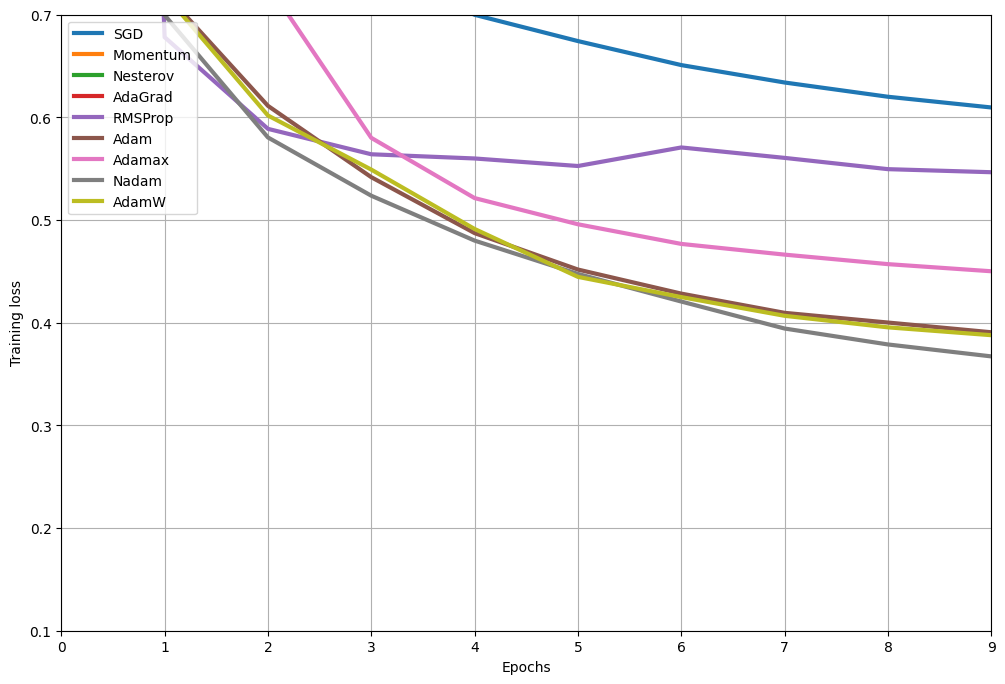

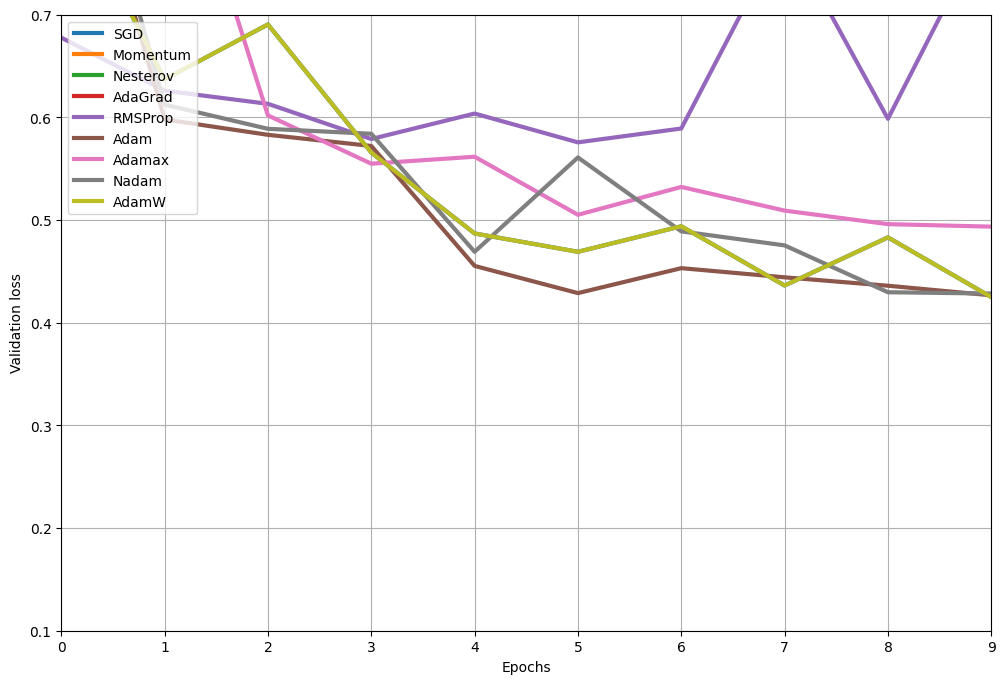

In [48]:
import numpy as np
import matplotlib.pyplot as plt
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum Nesterov AdaGrad RMSProp Adam Adamax Nadam AdamW"
    for history, opt_name in zip((history, history_momentum, history_NAG,
                                  ada_history, rmsp_history, adam_history,
                                  adamax_history, nadam_history, adamw_history),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper left")
    plt.axis([0, 9, 0.1, 0.7])
    plt.show()

# **Learning Rate Sheduling**

Starting with low learning rate and incresing and drop it or chosing large learning rate and reducing it and drop it will give good learning rate and this strategies called learning schedule.

## **Power Scheduling**

.
. (steps are hyperparameters(

*    learning rate = intial learning rate / (1+ step/decay step)**power
*   keras uses power = 1
*   (steps are hyperparameters)


*   learning rate drops after each steps.
*   After s steps, learning rate down by n/2.
*   After more s steps, learning rate down by n/3.
*   After more s steps, learning rate down by n/4 and so on.






Note: Optimizers used to have a decay argument for this, but it was deprecated. You must use the schedulers in tf.keras.optimizers.schedules instead.

In [13]:
lr_scheduler = tf.keras.optimizers.schedules.InverseTimeDecay(
    initial_learning_rate = 0.01,
    decay_steps = 10_000,
    decay_rate = 1.0,
    staircase = False
)
ps_optimizers = tf.keras.optimizers.SGD(learning_rate=lr_scheduler)

The InverseTimeDecay scheduler uses learning_rate = initial_learning_rate / (1 + decay_rate * step / decay_steps). If you set staircase=True, then it replaces step / decay_step with floor(step / decay_step).

In [14]:
history_power_scheduling = build_and_train_model(ps_optimizers)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0980 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 9/10
1719/

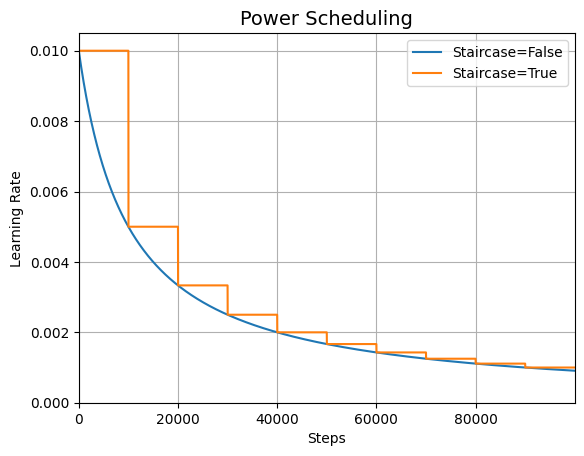

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


intial_learning_rate = 0.01
decay_rate = 1.0
decay_steps = 10_000


steps = np.arange(100_000)
lrs = initial_learning_rate / (1 + decay_rate * steps / decay_steps)
lrs2 = initial_learning_rate / (1 + decay_rate * np.floor(steps / decay_steps))


plt.plot(steps,lrs,"-",label="Staircase=False")
plt.plot(steps,lrs2,"-",label="Staircase=True")

plt.axis([0,steps.max(),0,0.0105])
plt.xlabel("Steps")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling",fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

## **Exponential Scheduling**


*   Setting learning rate to 0.1**(learning_rate/step)
*   Learning rate drops by factor of 10 every steps
*   learning_rate = initial_learning_rate * decay_rate ** (step / decay_steps)






In [28]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.01,
    decay_steps = 20_000,
    decay_rate = 1.0,
    staircase = False
)
es_optimizers = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
history_expo_scheduling = build_and_train_model(es_optimizers)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0978 - loss: 631487488.0000 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0994 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0997 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0993 - loss: 2.3027 - val_accuracy: 0.0980 - val_loss: 2.3027
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0993 - loss:

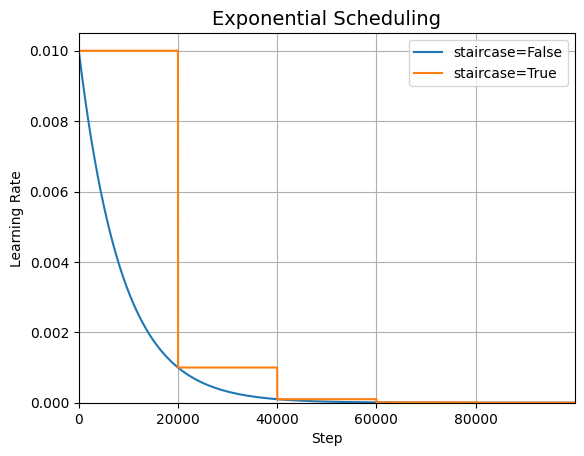

In [32]:
initial_learning_rate = 0.01
decay_rate = 0.1
decay_steps = 20_000

steps = np.arange(100_000)
lrs = initial_learning_rate * decay_rate ** (steps / decay_steps)
lrs2 = initial_learning_rate * decay_rate ** np.floor(steps / decay_steps)

plt.plot(steps, lrs,  "-", label="staircase=False")
plt.plot(steps, lrs2,  "-", label="staircase=True")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

Keras also provides a LearningRateScheduler callback class that lets you define your own scheduling function. Let's see how you could use it to implement exponential decay. Note that in this case the learning rate only changes at each epoch, not at each step:

In [33]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1 ** (epoch / 20)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)
# extra code – build and compile a model for Fashion MNIST

tf.random.set_seed(42)
model = build_model()
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
n_epochs = 20

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0976 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0089
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0079
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0071
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0063
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0056
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss

## **Precewise Constant Scheduling**

Using constant learning rate for number of epochs (learning rate = 0.01,epochs= 50) and then smaller learning rate for another number of epochs(learning_rate = 0.001,epochs=100).

In [34]:
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=[50_000, 80_000],
    values=[0.01, 0.005, 0.001]
)
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)
history_piecewise_scheduling = build_and_train_model(optimizer)  # extra code

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0976 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 

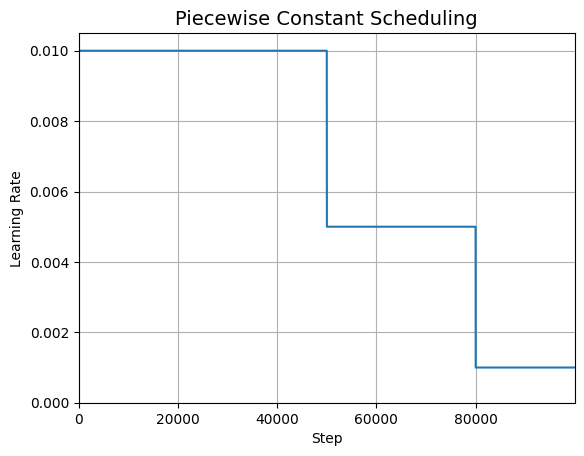

In [35]:
# extra code – this cell plots piecewise constant scheduling

boundaries = [50_000, 80_000]
values = [0.01, 0.005, 0.001]

steps = np.arange(100_000)

lrs = np.full(len(steps), values[0])
for boundary, value in zip(boundaries, values[1:]):
    lrs[boundary:] = value

plt.plot(steps, lrs, "-")
plt.axis([0, steps.max(), 0, 0.0105])
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

# **Performance Scheduling**

Measurse the validation error every N steps(just like early stopping) reduce learning rate by a factor λ.

In [36]:
model = build_model()
lr0 = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=lr0)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5) # for using performance scheduling
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0982 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0100
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0100
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0100
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0100
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0100
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 - val_loss: nan - learning_rate: 0.0050
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0984 - loss: nan - val_accuracy: 0.1042 -

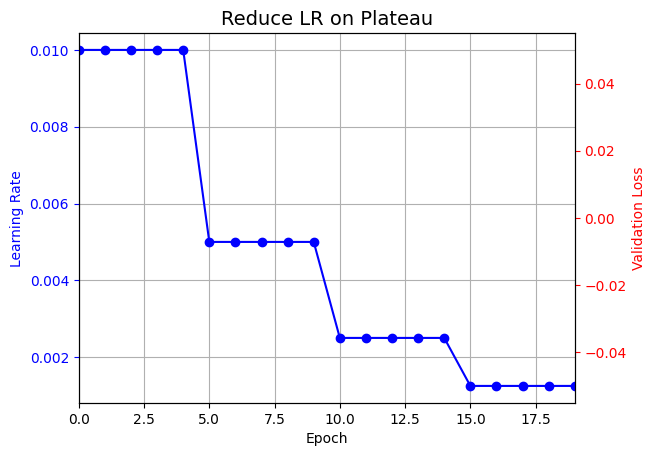

In [37]:
plt.plot(history.epoch, history.history["learning_rate"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

# **1Cycle Scheduling**

taking initial learning rate n1 and increasing to n1 halfway through training. Decease during the second half training.

In [38]:
class OneCycleScheduler(tf.keras.callbacks.Callback):
    def __init__(self, iterations, max_lr=1e-3, start_lr=None,
                 last_iterations=None, last_lr=None):
        self.iterations = iterations
        self.max_lr = max_lr
        self.start_lr = start_lr or max_lr / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_lr = last_lr or self.start_lr / 1000
        self.iteration = 0

    def _interpolate(self, iter1, iter2, lr1, lr2):
        return (lr2 - lr1) * (self.iteration - iter1) / (iter2 - iter1) + lr1

    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            lr = self._interpolate(0, self.half_iteration, self.start_lr,
                                   self.max_lr)
        elif self.iteration < 2 * self.half_iteration:
            lr = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                   self.max_lr, self.start_lr)
        else:
            lr = self._interpolate(2 * self.half_iteration, self.iterations,
                                   self.start_lr, self.last_lr)
        self.iteration += 1
        self.model.optimizer.learning_rate = lr

In [39]:
import math

batch_size = 128

model = build_model()
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])
n_epochs = 25
onecycle = OneCycleScheduler(math.ceil(len(X_train) / batch_size) * n_epochs,
                             max_lr=0.1)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid, y_valid),
                    callbacks=[onecycle])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0989 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0985 - loss: nan - val_accuracy: 0.1042 - val_loss: nan
Epoch 9/25
430/430 ━━━━━

# **Avoid Overfitting through Regularizaton**

Batch normalization also acts like a good regularizer.

l1 and l2 regularization

In [44]:
layer = tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal",kernel_regularizer=tf.keras.regularizers.l2(0.01))
# here l2 regularizer is called at each step during training
# if i want i can use both intializer at same time using kernel_regularizer=tf.keras.regularizer.l1_l2()

for using same regularizer to all layer in network. For that purpose using python functools.partial() function. which lets you create a thin wrapper for any callable, with some default argument values.

In [48]:
from functools import partial

RegularizerDense = partial(tf.keras.layers.Dense,activation="relu",kernel_initializer="he_normal",kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    RegularizerDense(100),
    RegularizerDense(100),
    RegularizerDense(10,activation="softmax")

])

In [49]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(loss="sparse_categorical_crossentropy",optimizer=optimizer,metrics=["accuracy"])
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0991 - loss: 1041292761963167744.0000 - val_accuracy: 0.0980 - val_loss: 366701730752102400.0000
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.0966 - loss: 271056623001141248.0000 - val_accuracy: 0.0980 - val_loss: 92672681144483840.0000
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.0951 - loss: 68501309577232384.0000 - val_accuracy: 0.0980 - val_loss: 23420229031821312.0000
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0951 - loss: 17311607642128384.0000 - val_accuracy: 0.0980 - val_loss: 5918755917922304.0000
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.0951 - loss: 4374985757949952.0000 - val_accuracy: 0.0980 - val_loss: 1495783832551424.0000


# **Dropout**

Dropout is most popular regularization techniques for deep learning. It gives 1%-2% accuracy boost to the model. During training every training step, every neuron (exclusding the output layer) has a probability p of being temporarily dropped out means active the neuron or turn it off. p ranges from 10% - 50%.
for RNN 20% - 40% and for CNN 40% - 50%.

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10,activation="softmax")
])

optimizer  = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=["accuracy"])

history = model.fit(X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1003 - loss: 15701830887152812032.0000 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.1006 - loss: 2.6377 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032


In [54]:
model.evaluate(X_train,y_train)

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1002 - loss: 2.3032


[2.303100824356079, 0.09994545578956604]

Note: make sure to use AlphaDropout instead of Dropout if you want to build a self-normalizing neural net using SELU.

# **Monte Carlo Dropout**

It boosts the performance of any trained dropout model without having to retain it or even modify it at all.

In [55]:
tf.random.set_seed(42)

In [56]:
import numpy as np
y_probas = np.stack([model(X_test,training=True) for sample in range(100)])

y_proba = y_probas.mean(axis=0)

In [57]:
model.predict(X_test[:1].round(3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


array([[0.1026048 , 0.10396709, 0.1014982 , 0.09404483, 0.10028909,
        0.10424249, 0.09930906, 0.09897752, 0.099912  , 0.09515494]],
      dtype=float32)

In [58]:
y_proba[0].round(3)

array([0.103, 0.104, 0.101, 0.094, 0.1  , 0.104, 0.099, 0.099, 0.1  ,
       0.095], dtype=float32)

In [59]:
y_std = y_probas.std(axis=0)
y_std[0].round(3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [60]:
y_pred = y_proba.argmax(axis=1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

np.float64(0.1)

In [61]:
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=None):
        return super().call(inputs, training=True)

In [62]:
# extra code – shows how to convert Dropout to MCDropout in a Sequential model
Dropout = tf.keras.layers.Dropout
mc_model = tf.keras.Sequential([
    MCDropout(layer.rate) if isinstance(layer, Dropout) else layer
    for layer in model.layers
])
mc_model.set_weights(model.get_weights())

In [63]:
mc_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout (MCDropout)          │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_1 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_2 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mc_dropout_3 (MCDropout)        │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,710 (389.49 KB)

 Trainable params: 99,710 (389.49 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
tf.random.set_seed(42)
np.mean([mc_model.predict(X_test[:1])
         for sample in range(100)], axis=0).round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

array([[0.1 , 0.1 , 0.1 , 0.09, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ]],
      dtype=float32)

# **Max-Norm Regularization**

For each neurons, it constrains the weights W of incoming connections such that

In [66]:
dense = tf.keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal",kernel_constraint=tf.keras.constraints.max_norm(1.))

In [67]:
# extra code – shows how to apply max norm to every hidden layer in a model

MaxNormDense = partial(tf.keras.layers.Dense,
                       activation="relu", kernel_initializer="he_normal",
                       kernel_constraint=tf.keras.constraints.max_norm(1.))

tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(100),
    MaxNormDense(100),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1014 - loss: 154.1463 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.1006 - loss: 2.3035 - val_accuracy: 0.1006 - val_loss: 2.3032
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1006 - loss: 2.303